## Importing Libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urlparse import urlparse
from dateparser import parse

## Data Exploration

In [32]:
train = pd.read_csv('Training_Data.csv')
test = pd.read_csv('Testing_Data.csv')
train.shape

(1157, 9)

In [33]:
train.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0


In [131]:
for i in range(5):
    print train.Link[i]

http://cafepharma.com/boards/threads/epstein.596312/#post-5688458
http://www.patient.co.uk/forums/discuss/enlarged-heart-511396?order=latest#2095508
http://abcnewsradioonline.com/entertainment-news/queen-latifah-joins-american-heart-associations-red-steps-ca.html?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+abcnewsradio%2Fentertainmentnews+%28ABC+News+Radio+-+Entertainment+News%29
http://www.cancer-forums.net/viewtopic.php?f=15&t=193343
http://www.diyaudio.com/forums/lounge/292252-diy-silver-interconnects-rcas-15.html#post4746950


In [102]:
train.sample(5)

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
425,FORUMS,mdmpathway.com,http://mdmpathway.com/method-selective-interfe...,2/26/2016,0:31:00,2/26/2016 11:01,The method is quite selective There was no oth...,The method is quite selective There was no oth...,0
662,FORUMS,healthunlocked.com,https://healthunlocked.com/nras/posts/13379646...,7/5/2016,7:44:00,NaN,HealthUnlocked | The social network for health,I've got terrible pain in my foot. It started ...,1
737,FORUMS,www.examiner.com,http://www.examiner.com/article/former-ufc-cha...,2/11/2016,17:41:00,2/11/2016 22:41,Former UFC Champ Kevin Randleman dies after su...,Kevin Randleman Getty Images Former UFC heavyw...,0
950,YOUTUBE,http://www.youtube.com,http://youtube.com/watch?v=JS_fQtCeP_E,6/20/2016,13:14:40,6/20/2016 22:44,Hospitalizations for heart failure spike after...,Description: Hospitalizations for heart failur...,0
938,FORUMS,www.icdsupportgroup.org,http://www.icdsupportgroup.org/board/viewtopic...,6/8/2016,5:49:00,6/8/2016 15:19,Travel to remote places,I was 37 when I got my ICD because my cardiomy...,1


In [103]:
for col in train.columns:
    print col,':::',train[col].describe()
    print '$$$$$$$$$$$$$$$$$'

Source ::: count       1157
unique         5
top       FORUMS
freq         669
Name: Source, dtype: object
$$$$$$$$$$$$$$$$$
Host ::: count               1098
unique               615
top       www.reddit.com
freq                  58
Name: Host, dtype: object
$$$$$$$$$$$$$$$$$
Link ::: count                                                  1157
unique                                                 1152
top       http://www.biospace.com/news_story.aspx?StoryI...
freq                                                      2
Name: Link, dtype: object
$$$$$$$$$$$$$$$$$
Date(ET) ::: count          1157
unique          167
top       6/15/2016
freq             69
Name: Date(ET), dtype: object
$$$$$$$$$$$$$$$$$
Time(ET) ::: count        1157
unique        962
top       8:00:00
freq           28
Name: Time(ET), dtype: object
$$$$$$$$$$$$$$$$$
time(GMT) ::: count                996
unique               967
top       6/27/2016 5:30
freq                   7
Name: time(GMT), dtype: object
$$$$$$$$$$

### Check whether balanced class

In [104]:
train.Patient_Tag.value_counts()/train.shape[0]*100

0    79.256698
1    20.743302
Name: Patient_Tag, dtype: float64

### Based on Source

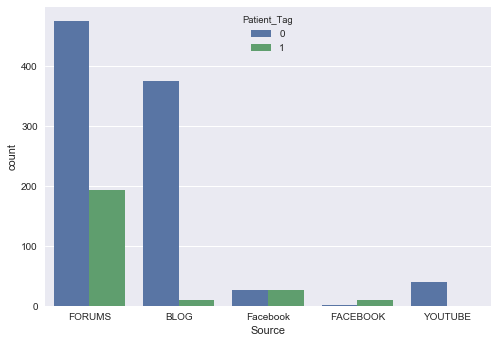

In [105]:
sns.countplot('Source',data=train,hue='Patient_Tag')
plt.show()

In [106]:
url_paths = train.Link.apply(lambda x: urlparse(x).path)
url_paths

0                         /boards/threads/epstein.596312/
1                   /forums/discuss/enlarged-heart-511396
2       /entertainment-news/queen-latifah-joins-americ...
3                                          /viewtopic.php
4       /forums/lounge/292252-diy-silver-interconnects...
5                                          /viewtopic.php
6       /r/todayilearned/comments/4hd2ry/til_that_cvs_...
7       /2016/02/causes-of-low-blood-pressurehypo-tens...
8                     /health-care-news/cluster864111600/
9       /boards/threads/nominations-for-worst-manager-...
10                                  /forums/post/960268/2
11      /site/2016/02/22/this-low-blood-pressure-diet-...
12      /2016/04/blood-pressure-monitoring-and-testing...
13      /money-morning/australia/how-much-tax-can-a-ta...
14               /comments/9116353/Now-is-when-doves-cry-
15      /2016/03/28/do-it-yourself-blood-pressure-chec...
16                                    /mbview/threadview/
17      /2016/

## Missing Value Treatment

### Check for missing values

In [62]:
(train.isnull()).describe()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
count,1157,1157,1157,1157,1157,1157,1157,1157,1157
unique,1,2,1,1,1,2,2,2,1
top,False,False,False,False,False,False,False,False,False
freq,1157,1098,1157,1157,1157,996,941,1156,1157


### Fill missing Host by host derived from the post link

In [63]:
url_missing_hosts = train.loc[train.Host.isnull()].Link
train['Host'] = train.apply(lambda x: urlparse(x['Link']).netloc if x['Link'] in list(url_missing_hosts) else x['Host'], axis=1)

### Fill Missing Title Values by first 100 characters from the convo

In [64]:
url_missing_title = train.loc[train.Title.isnull()].Link
train['Title'] = train.apply(lambda x: x['TRANS_CONV_TEXT'][:100] if x['Link'] in list(url_missing_title) else x['Title'], axis = 1)

## Feature Extraction

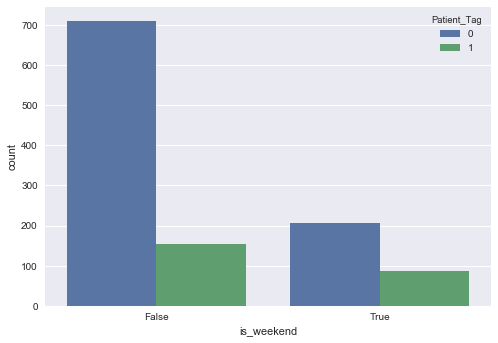

In [150]:
#Hypothesis for Weekends
train['is_weekend'] = train['Date(ET)'].apply(lambda x: parse(x).weekday() == 5 or parse(x).weekday() == 6)
sns.countplot('is_weekend', data = train, hue = 'Patient_Tag')
plt.show()

### OHE Source

In [151]:
source_dummies = pd.get_dummies(train.Source)
train = pd.concat([train, source_dummies],axis=1)

### Cleaning Title

In [43]:
import re
# train['Title'] = train.Title.apply(lambda x: re.sub(r'[^\x00-\x7F]+',' ', x))
train['TRANS_CONV_TEXT'] = train.TRANS_CONV_TEXT.apply(lambda x: re.sub(r'[^\x00-\x7F]+',' ', str(x)))

test['TRANS_CONV_TEXT'] = test.TRANS_CONV_TEXT.apply(lambda x: re.sub(r'[^\x00-\x7F]+',' ', str(x)))

### NLP Title

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english', ngram_range=(1,7))
tvec_weights = tvec.fit_transform(train.Title.dropna())
weights = np.asarray(tvec_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

,term,weight
545,new,0.012932
804,thread,0.011871
342,health,0.011804
675,risk,0.010613
174,congestive heart,0.010291
173,congestive,0.010291
434,just,0.010218
175,congestive heart failure,0.010148
470,life,0.010009
14,2016,0.009502


In [95]:
tvec.vocabulary_

{u'000': 0,
 u'10': 1,
 u'100': 2,
 u'11': 3,
 u'12': 4,
 u'13': 5,
 u'14': 6,
 u'15': 7,
 u'15 years': 8,
 u'16': 9,
 u'18': 10,
 u'19': 11,
 u'200': 12,
 u'2015': 13,
 u'2016': 14,
 u'25': 15,
 u'26': 16,
 u'27': 17,
 u'31': 18,
 u'40': 19,
 u'44': 20,
 u'50': 21,
 u'71': 22,
 u'94': 23,
 u'94 california': 24,
 u'acid': 25,
 u'actor': 26,
 u'actually': 27,
 u'acute': 28,
 u'added': 29,
 u'added benefit': 30,
 u'adult': 31,
 u'advanced': 32,
 u'advani': 33,
 u'advani wife': 34,
 u'african': 35,
 u'age': 36,
 u'aged': 37,
 u'aged 71': 38,
 u'ago': 39,
 u'agreement': 40,
 u'alogliptin': 41,
 u'american': 42,
 u'american heart': 43,
 u'american heart association': 44,
 u'americans': 45,
 u'angioplasty': 46,
 u'ankle': 47,
 u'ankle defensive': 48,
 u'ankle defensive medicine': 49,
 u'announced': 50,
 u'announces': 51,
 u'annual': 52,
 u'antidepressant': 53,
 u'anxiety': 54,
 u'ap': 55,
 u'apnea': 56,
 u'application': 57,
 u'approval': 58,
 u'april': 59,
 u'arterial': 60,
 u'artery': 61,
 

## Cross Validation

In [17]:
train.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag,is_weekend,BLOG,FACEBOOK,FORUMS,Facebook,YOUTUBE
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0,False,0,0,1,0,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1,True,0,0,1,0,0
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0,False,1,0,0,0,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1,True,0,0,1,0,0
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0,False,0,0,1,0,0


In [119]:
from sklearn.model_selection import train_test_split
y = train.Patient_Tag
X = train.drop(['Source','Host','Link','Date(ET)','Time(ET)','time(GMT)','is_weekend','Title','TRANS_CONV_TEXT','Patient_Tag'], axis=1)
x_cv, x_train, y_cv, y_train = train_test_split(X, y, test_size = 0.33)

ValueError: labels ['is_weekend'] not contained in axis

In [19]:
x_train.head()

,BLOG,FACEBOOK,FORUMS,Facebook,YOUTUBE
830,0,0,1,0,0
674,0,0,1,0,0
345,1,0,0,0,0
961,0,0,1,0,0
216,0,0,1,0,0


## Model Building

### Basic RF

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rfmodel = RandomForestClassifier(n_jobs=-1)
rfmodel = rfmodel.fit(x_train, y_train)
predict = rfmodel.predict(x_cv)
print 'ROC_AUC', roc_auc_score(y_cv,predict)

ROC_AUC 0.554674440618


### Build an NLP Pipeline

In [120]:
train.head()

,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT,Patient_Tag
0,FORUMS,cafepharma.com,http://cafepharma.com/boards/threads/epstein.5...,6/15/2016,13:58:00,6/15/2016 23:28,Epstein,I don't disagree with you in principle. I'm ju...,0
1,FORUMS,www.patient.co.uk,http://www.patient.co.uk/forums/discuss/enlarg...,5/7/2016,0.820833333,42498.21667,Enlarged Heart.Thread Enlarged Heart,I am always dizzy I get dizzy standing up so I...,1
2,BLOG,http://abcnewsradioonline.com/entertainment-news,http://abcnewsradioonline.com/entertainment-ne...,4/14/2016,15:00:38,4/15/2016 0:30,Queen Latifah Joins American Heart Association...,Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...,0
3,FORUMS,www.cancer-forums.net,http://www.cancer-forums.net/viewtopic.php?f=1...,6/18/2016,20:46:00,6/19/2016 6:16,Bulaemia,I am 17 and I have been throwing up for about ...,1
4,FORUMS,www.diyaudio.com,http://www.diyaudio.com/forums/lounge/292252-d...,6/15/2016,3:26:00,6/15/2016 12:56,DIY Silver interconnects and RCAs???,Quote: Originally Posted by Boyan Silyavski Wa...,0


In [58]:
from sklearn.model_selection import train_test_split


x_nlpcv, x_nlptrain, y_nlpcv, y_nlptrain = train_test_split(train.TRANS_CONV_TEXT, train.Patient_Tag, random_state=43)

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='log', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)),
])

text_clf = text_clf.fit(x_nlptrain, y_nlptrain)
predict_nlp = text_clf.predict_proba(x_nlpcv)
print 'ROC_AUC', roc_auc_score(y_nlpcv,predict_nlp[:,1])

ROC_AUC 0.95296430732


In [54]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score

text_clf_svm = Pipeline([('vect', CountVectorizer()),\
                    ('tfidf', TfidfTransformer()), \
                      ('clf-svm', SGDClassifier(loss='log', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)),])
x_train1, x_test1, y_train1, y_test1 = train_test_split(train['TRANS_CONV_TEXT'], train['Patient_Tag'], random_state = 43)
text_clf_svm.fit(x_train1, y_train1)
predicted_svm = text_clf_svm.predict_proba(x_test1)
print roc_auc_score(y_test1,predicted_svm[:,1])

0.971670273461


In [123]:
# from sklearn.ensemble import RandomForestClassifier

# x_nlptrain = pd.concat([X_nlp,pd.get_dummies(X_nlp.Source)],axis = 1)
# y_nlptrain = pd.concat([test,pd.get_dummies(test.Source)],axis = 1)

# rfmodel = RandomForestClassifier(n_jobs=-1)
# rfmodel = rfmodel.fit(x_nlptrain.drop(['TRANS_CONV_TEXT', 'Source'], axis=1), y_nlptrain)
# predict = rfmodel.predict(x_nlpcv.drop(['TRANS_CONV_TEXT','Source'], axis=1))

In [224]:
predict_final = (predict_nlp*0.8+predict*0.2)

In [225]:
print 'ROC_AUC', roc_auc_score(y_nlpcv,predict_final)

ROC_AUC 0.861972424884
